In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data=pd.read_csv('delhiaqi.csv')

In [3]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [4]:
data['date']=pd.to_datetime(data['date'])
data.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
 1   co      561 non-null    float64       
 2   no      561 non-null    float64       
 3   no2     561 non-null    float64       
 4   o3      561 non-null    float64       
 5   so2     561 non-null    float64       
 6   pm2_5   561 non-null    float64       
 7   pm10    561 non-null    float64       
 8   nh3     561 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 39.6 KB


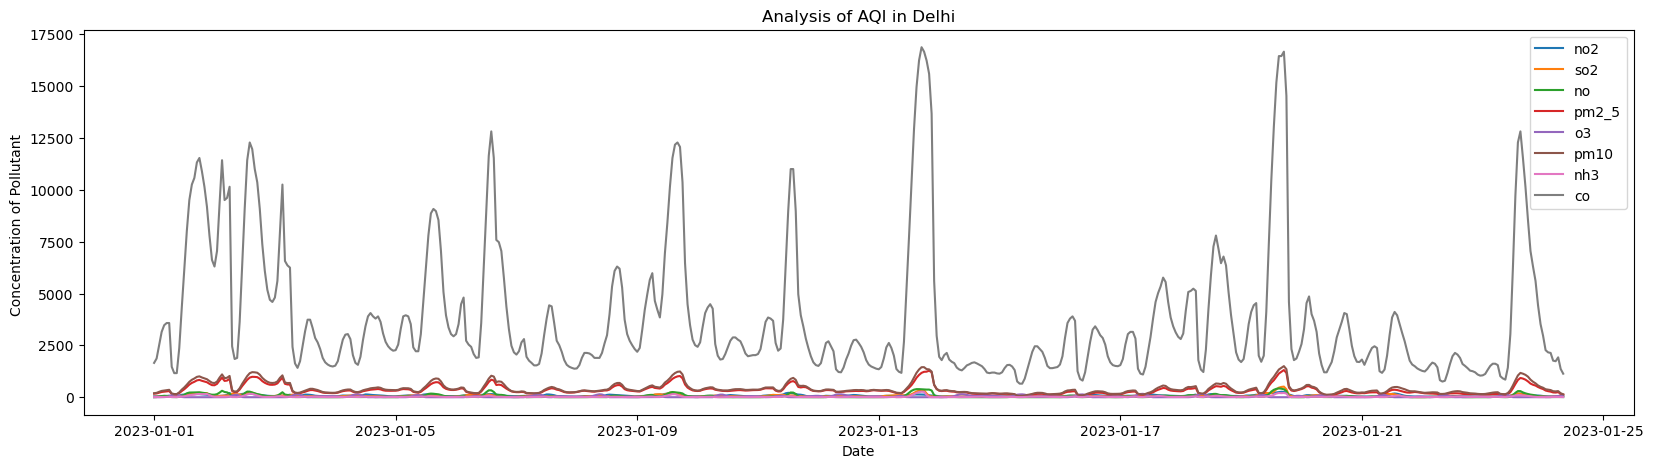

In [9]:
plt.figure(figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Concentration of Pollutant ')
plt.title('Analysis of AQI in Delhi')
pollutants=['no2','so2','no','pm2_5','o3','pm10','nh3','co']
for i in pollutants:
    plt.plot(data['date'],data[i])
    plt.legend(pollutants)
plt.show()

In [14]:
aqi_range = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
    ]

def aqi_calculate(pollutant,conc):
    for low,high,aqi in aqi_range:
        if low <= conc <=high:
            return aqi
    return None

def overall_aqi(row):
    value=[]
    pollutants=['co','no','no2','o3','so2','pm2_5','pm10','nh3']
    for i in pollutants:
        aqi = aqi_calculate(i,row[i])
        if aqi is not None:
            value.append(aqi)
    return max(value)

In [20]:
data['aqi']=data.apply(overall_aqi,axis=1)

aqi_categories=[(0, 50, 'Good'), (51, 100, 'Moderate'), 
              (101, 150, 'Unhealthy for Sensitive Groups'),
              (151, 200, 'Unhealthy'), 
              (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')]

def aqi_category(aqi_value):
    for low,high,category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

data['AQI_Category'] = data['aqi'].apply(aqi_category)

In [21]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,AQI_Category
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous


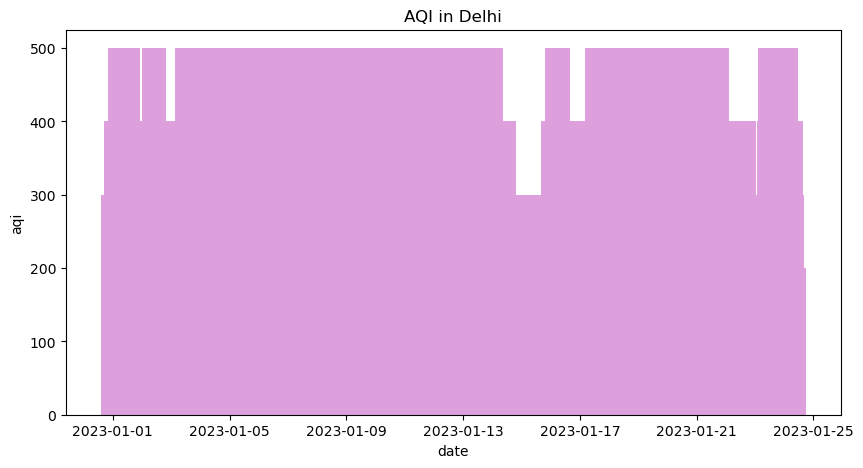

In [22]:
plt.figure(figsize=(10,5))
plt.xlabel('date')
plt.ylabel('aqi')
plt.title('AQI in Delhi')
plt.bar(data['date'],data['aqi'],color='plum')
plt.show()

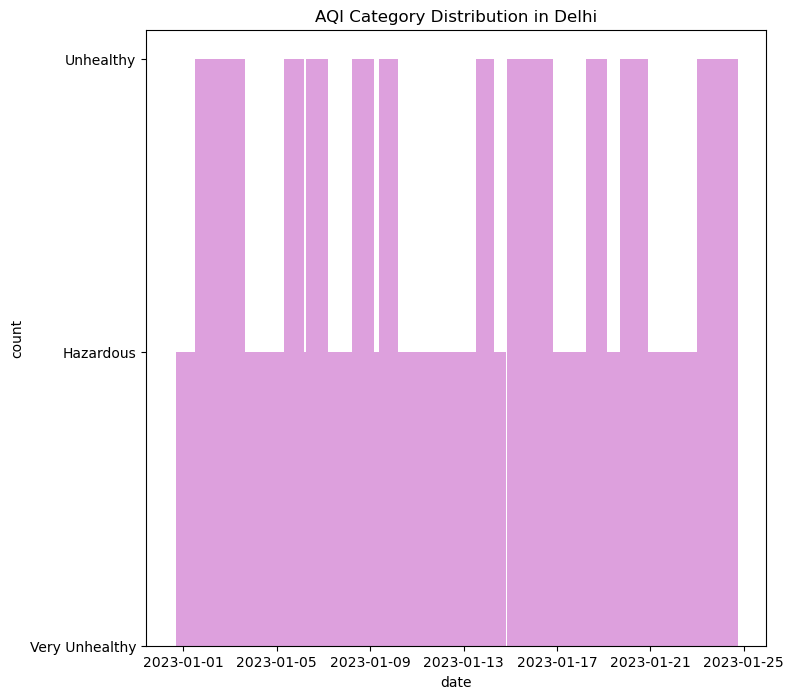

In [24]:
plt.figure(figsize=(8,8))
plt.xlabel('date')
plt.ylabel('count')
plt.title('AQI Category Distribution in Delhi')
plt.bar(data['date'],data['AQI_Category'],color='plum')
plt.show()

In [27]:
pollutant_concentration=pd.DataFrame({'Pollutant':pollutants,'Concentration':data[pollutants].sum()})
pollutant_concentration.head()
exp=np.array([0,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

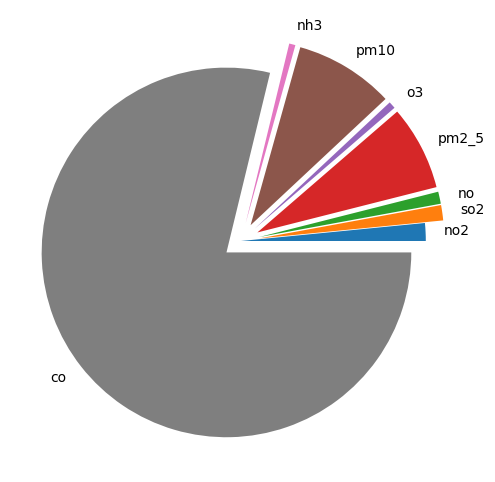

In [30]:
plt.figure(figsize=(6,6))
plt.pie(pollutant_concentration['Concentration'],labels=pollutants,explode=exp,startangle=0)
plt.show()

In [35]:
data['day']=data['date'].dt.day_name()
aqi_by_day=data.groupby('day').agg({'aqi':'mean'}).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
aqi_by_day.head()

,aqi
day,
Monday,340.625000
Tuesday,403.703704
Wednesday,425.000000
Thursday,423.611111
Friday,383.333333


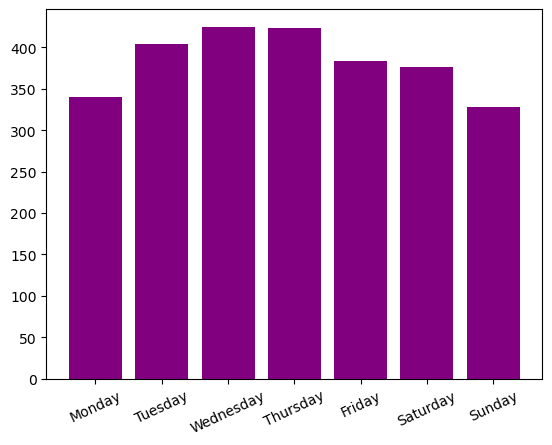

In [41]:
plt.bar(aqi_by_day.index,aqi_by_day['aqi'], color='purple')
plt.xticks(rotation=25)
plt.show()

In [42]:
corr=data[pollutants].corr()
corr

,no2,so2,no,pm2_5,o3,pm10,nh3,co
no2,1.000000,0.734961,0.702201,0.698696,-0.407177,0.720050,0.700254,0.776402
so2,0.734961,1.000000,0.734503,0.648996,-0.049158,0.658325,0.843635,0.716831
no,0.702201,0.734503,1.000000,0.888810,-0.377813,0.903339,0.823638,0.969740
pm2_5,0.698696,0.648996,0.888810,1.000000,-0.450458,0.994088,0.720303,0.953083
o3,-0.407177,-0.049158,-0.377813,-0.450458,1.000000,-0.468477,-0.299663,-0.463082
pm10,0.720050,0.658325,0.903339,0.994088,-0.468477,1.000000,0.754468,0.966801
nh3,0.700254,0.843635,0.823638,0.720303,-0.299663,0.754468,1.000000,0.826299
co,0.776402,0.716831,0.969740,0.953083,-0.463082,0.966801,0.826299,1.000000


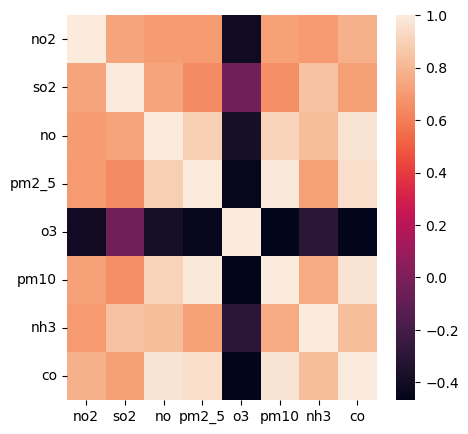

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))
ticks = np.arange(len(corr.columns))

# Set ticks and labels
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
sns.heatmap(corr)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()